In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
olympic_filepath = '../DATA/olympic.csv'
df = pd.read_csv(olympic_filepath,skiprows=4)

In [26]:
df['NOC'].head()

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

## in which events did jesse owens  win a medal?

In [27]:
joo = df[df['Athlete'] =='OWENS, Jesse']

In [28]:
joo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [29]:
joo['Event'].value_counts()

200m            1
100m            1
4x100m relay    1
long jump       1
Name: Event, dtype: int64

### Which country has won the most men's gold medal in singles badminton over the years?

In [30]:
gbm =df[(df['Gender']== 'Men') & (df['Medal']=='Gold') & (df['Sport']=='Badminton')]

In [31]:
gbm.sort_values('Athlete').head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
25718,Athens,2004,Badminton,Badminton,"HA, Tae-Kwon",KOR,Men,doubles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold


### which countries have won the most medals in recent year

In [32]:
recent = df[df['Edition']>= 2002]

In [33]:
recent['NOC'].value_counts().head(10)

USA    579
RUS    335
AUS    306
CHN    278
GER    250
JPN    145
ITA    144
NED    138
GBR    134
KOR    130
Name: NOC, dtype: int64

### display the male gold medal winners for the 100m track and field sprint event over the years.

In [34]:
mg = df[(df['Medal']=='Gold') & (df['Event']=='100m') & (df['Gender'] == 'Men')]

###### Using groupby(), plot the total number of medals awarded at each of the olympic games throughout history

In [35]:
df.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [36]:
df.set_index(['Sport'], inplace=True)

In [37]:
df.head(1)

,City,Edition,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
Sport,,,,,,,,,
Aquatics,Athens,1896,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


In [38]:
df.reset_index(inplace = True)

In [39]:
df.head(1)

,Sport,City,Edition,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Aquatics,Athens,1896,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


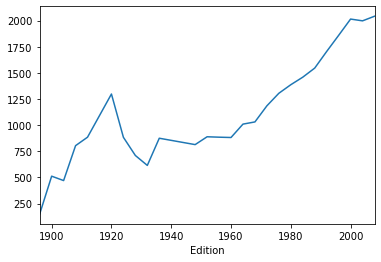

In [40]:
df.groupby('Edition').size().plot();

#### create a list showing the total number of medals won for each country over the history of the olympics. For each country, include the year of the first and most recent olympic medal wins

In [41]:
df.head(1)

,Sport,City,Edition,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Aquatics,Athens,1896,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


In [42]:
df.groupby('NOC').Medal.value_counts().head()

NOC  Medal 
AFG  Bronze    1
AHO  Silver    1
ALG  Bronze    8
     Gold      4
     Silver    2
Name: Medal, dtype: int64

In [43]:
df.groupby('NOC').agg({'Edition':['min', 'max','count']}).head()

Edition            
        min   max count
NOC                    
AFG    2008  2008     1
AHO    1988  1988     1
ALG    1984  2008    14
ANZ    1908  1912    29
ARG    1924  2008   239

##### plot the number of gold medals won by the us male and female athletes throughout the history of the olympics?

In [44]:
df.head(1)

,Sport,City,Edition,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Aquatics,Athens,1896,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


In [45]:
gm = df[(df['NOC'] == 'USA') & (df['Medal'] == 'Gold')]

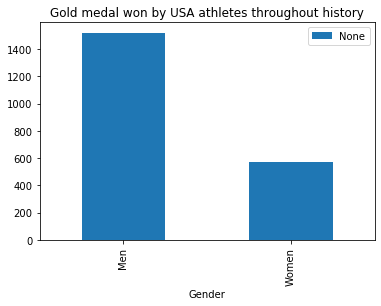

In [46]:
gm.groupby('Gender').size().plot(kind = 'bar')
plt.title ('Gold medal won by USA athletes throughout history')
plt.legend();

###### Plot the five athletes who have won the most gold medals over the history of the olympics. When there is a tie, consider the number of silver medals, and then bronze medals

In [47]:
gmm = df.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value =0)

In [48]:
gmc = gmm.sort_values(['Gold', 'Silver', 'Bronze'], ascending= False). head()

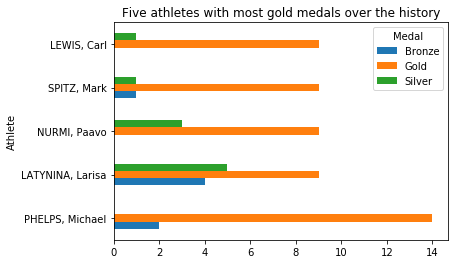

In [49]:
gmc.plot(kind = 'barh')
plt.title('Five athletes with most gold medals over the history');

In [63]:
df.head(1)

,Sport,City,Edition,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Aquatics,Athens,1896,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


In [64]:
df2008= df[df['Edition'] ==2008]

In [65]:
gg = df2008.groupby(['NOC', 'Medal', 'Gender']).size().unstack('Medal', fill_value=0)
gg.head()

Medal       Bronze  Gold  Silver
NOC Gender                      
AFG Men          1     0       0
ALG Men          0     0       1
    Women        1     0       0
ARG Men         14    20       0
    Women       17     0       0

In [66]:
gg = df2008.groupby(['NOC', 'Medal', 'Gender']).size().unstack('Medal',fill_value=0)
gg.head()

Medal       Bronze  Gold  Silver
NOC Gender                      
AFG Men          1     0       0
ALG Men          0     0       1
    Women        1     0       0
ARG Men         14    20       0
    Women       17     0       0

In [67]:
go = gg.sort_values(['Gold', 'Silver','Bronze'], ascending = False)[['Gold','Silver', 'Bronze']]

In [68]:
go.head()

Medal       Gold  Silver  Bronze
NOC Gender                      
USA Men       67      29      57
    Women     58      80      24
CHN Women     40      42      46
NED Women     39      17       2
CHN Men       34      11      11

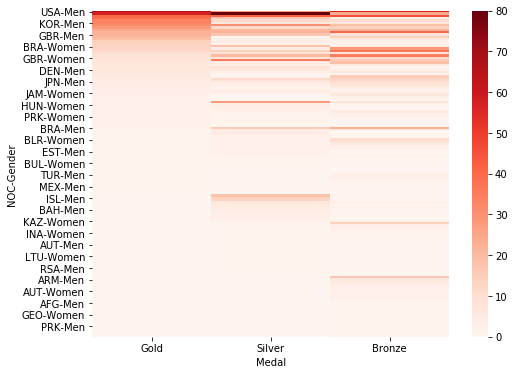

In [71]:
# change the color of heatmap [Greys, Purples, Blues, Greens, Oranges, Reds, YlorBr (yellow or brown), YlorRd (yellow or red), BuGn (blue green),YlGn(Yellow Green)]
plt.figure(figsize = [8,6])
sns.heatmap(go,cmap="Reds");